# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [14]:
# Load .env enviroment variables
load_dotenv("example.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc = requests.get(btc_url)
response_data_btc
btc_content = response_data_btc.content
btc_content
btc_data = response_data_btc.json()
import json
print(json.dumps(btc_data, indent=4))



# Fetch current ETH price
# YOUR CODE HERE!]
response_data_eth = requests.get(eth_url)
eth_content = response_data_eth.content
eth_data = response_data_eth.json()
import json
print(json.dumps(eth_data, indent=4))
# Compute current value of my crpto
# YOUR CODE HERE!
btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18672431,
            "total_supply": 18672431,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 59338.0,
                    "volume_24h": 47820603185,
                    "market_cap": 1107918666796,
                    "percentage_change_1h": -0.0963113082319631,
                    "percentage_change_24h": 0.302528453371428,
                    "percentage_change_7d": 7.82212239420679,
                    "percent_change_1h": -0.0963113082319631,
                    "percent_change_24h": 0.302528453371428,
                    "percent_change_7d": 7.82212239420679
                },
                "CAD": {
                    "price": 74599.7336,
                    "volume_24h": 60120062324.182,
                 

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [18]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [23]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset( tickers, timeframe, start=start_date, end=end_date,).df

# Preview DataFrame and drop Time component of index
df_portfolio.index = df_portfolio.index.date
df_portfolio


AGG                                     SPY                  \
              open    high     low   close   volume   open    high     low   
2021-04-01  113.93  114.05  113.83  114.02  9491631  398.4  400.67  398.18   

                              
             close    volume  
2021-04-01  400.53  72714084

In [24]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.02
Current SPY closing price: $400.53


In [25]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20026.50
The current value of your 200 AGG shares is $22804.00


### Savings Health Analysis

In [33]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'Amount':[total_crypto, total_shares_value]} 
data
# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['Crypto', 'Shares']) 

# Display savings DataFrame
df_savings

Amount
Crypto  82383.565
Shares  42830.500

<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

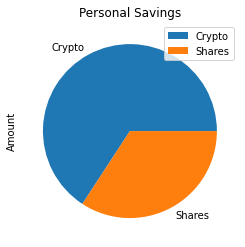

In [35]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Personal Savings")

In [39]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value
total_savings

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [41]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2016-04-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()

In [45]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data

df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                        SPY            \
              open    high       low   close   volume    open      high   
2020-11-06  117.81  117.86  117.6699  117.80  5106146  349.93  351.5100   
2020-11-09  117.40  117.47  117.0600  117.24  6073474  363.97  364.3800   
2020-11-10  117.05  117.23  117.0300  117.05  4663301  353.49  355.1800   
2020-11-11  117.06  117.18  117.0200  117.15  3001773  356.40  357.5600   
2020-11-12  117.37  117.63  117.3300  117.62  7438935  355.58  356.7182   

                                       
               low   close     volume  
2020-11-06  347.65  350.19   58137413  
2020-11-09  354.06  354.54  140613847  
2020-11-10  350.51  354.07   69143380  
2020-11-11  355.06  356.62   45627772  
2020-11-12  351.26  353.28   57393573

In [46]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [48]:
# Printing the simulation input data
MC_Portfolio.portfolio_data.head()

AGG                                                     SPY  \
              open    high       low   close   volume daily_return    open   
2020-11-06  117.81  117.86  117.6699  117.80  5106146          NaN  349.93   
2020-11-09  117.40  117.47  117.0600  117.24  6073474    -0.004754  363.97   
2020-11-10  117.05  117.23  117.0300  117.05  4663301    -0.001621  353.49   
2020-11-11  117.06  117.18  117.0200  117.15  3001773     0.000854  356.40   
2020-11-12  117.37  117.63  117.3300  117.62  7438935     0.004012  355.58   

                                                              
                high     low   close     volume daily_return  
2020-11-06  351.5100  347.65  350.19   58137413          NaN  
2020-11-09  364.3800  354.06  354.54  140613847     0.012422  
2020-11-10  355.1800  350.51  354.07   69143380    -0.001326  
2020-11-11  357.5600  355.06  356.62   45627772     0.007202  
2020-11-12  356.7182  351.26  353.28   57393573    -0.009366

In [49]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1           2           3           4           5    \
0       1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1       0.997547    1.007057    1.000343    0.995905    0.993940    0.996363   
2       0.992550    1.008665    0.996402    0.999783    0.989406    0.994250   
3       0.999403    1.012363    1.002558    1.003730    0.992301    0.988936   
4       0.996551    1.011961    0.996866    1.007552    0.992620    0.998466   
...          ...         ...         ...         ...         ...         ...   
7556  169.935382  237.001021  275.677508  213.038561  142.434999  194.858997   
7557  170.924886  238.509945  277.735157  212.815977  142.229229  195.387939   
7558  171.939250  237.536720  278.343441  213.193863  142.199465  196.428184   
7559  172.809373  237.149002  276.012705  214.038890  142.195227  197.329676   
7560  172.445543  236.178063  275.978150  215.963786  142.465008  196.184051   

             6           7           8           9    ...         490  \
0       1.000000    1.000000    1.000000    1.000000  ...    1.000000   
1       0.995211    1.001782    0.991167    1.000837  ...    0.998540   
2       0.993683    1.000253    1.003201    1.018492  ...    0.997977   
3       0.989747    1.005995    0.999466    1.025962  ...    1.001199   
4       0.988250    0.998680    0.995967    1.021881  ...    0.995689   
...          ...         ...         ...         ...  ...         ...   
7556  242.598922  154.074864  177.327811  126.717946  ...  162.986383   
7557  242.090139  154.474972  177.562783  126.344180  ...  162.665162   
7558  243.154488  154.082092  177.473460  125.470764  ...  163.802158   
7559  243.502699  153.461516  178.625000  126.306152  ...  163.649694   
7560  245.291842  153.163694  178.739662  125.900997  ...  162.193985   

             491         492         493         494         495         496  \
0       1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
1       1.010243    0.990069    1.005822    0.997826    1.002353    1.005917   
2       1.013749    0.990737    1.008422    0.999954    1.005317    1.015245   
3       1.010602    0.983638    1.011277    1.003634    1.000813    1.023628   
4       1.009765    0.985071    1.014809    0.998444    0.995381    1.028504   
...          ...         ...         ...         ...         ...         ...   
7556  221.785761  176.185571  351.942165  104.547878  196.139223  174.784547   
7557  222.944564  175.590790  352.134895  105.756318  196.400318  174.121252   
7558  225.529522  174.998404  351.829937  105.225978  196.955358  173.469416   
7559  224.555502  174.320528  352.253007  105.887210  197.133724  173.361838   
7560  225.575964  173.772612  352.856537  105.827100  198.196573  172.810802   

             497         498         499  
0       1.000000    1.000000    1.000000  
1       0.999190    0.995839    0.999150  
2       0.999239    0.998282    1.010112  
3       0.994423    1.000577    1.008272  
4       0.994394    1.004562    1.002527  
...          ...         ...         ...  
7556  171.555226  164.031198  214.790904  
7557  172.744702  162.679489  213.888897  
7558  172.431289  163.830420  212.796113  
7559  173.323814  165.726079  213.134668  
7560  174.208465  165.649925  213.811115  

[7561 rows x 500 columns]

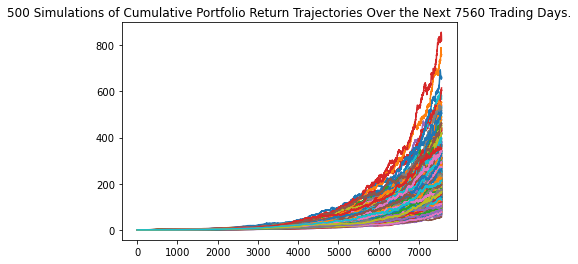

In [50]:
# Plot simulation outcomes
line_plot = MC_Portfolio.plot_simulation()

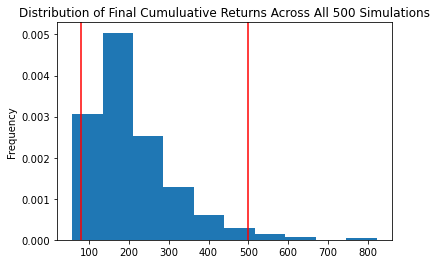

In [51]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Portfolio.plot_distribution()

### Retirement Analysis

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_Portfolio.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean            210.308948
std             107.515898
min              56.861932
25%             139.039674
50%             182.118360
75%             253.061473
max             822.270164
95% CI Lower     79.598923
95% CI Upper    498.370087
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [58]:
# Set initial investment
initial_investment = 20000

ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1591978.47 and $9967401.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [59]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $2387967.7 and $14951102.6


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")